## 1.Pandas与Numpy操作
1.读取sz50.xlsx的['600036.XSHG','600050.XSHG','601318.XSHG']的全数据做成Panel

2.把Panel转成ndim为3的Numpy，然后用array的切片读取ndim为2的三只股票最近20天的收盘价

3.计算20天收盘价的对数，然后求对数的一天差值，得到对数收益率。

4.用Numpy将每只股票的对数收益率累加。

In [1]:
import numpy as np
from datetime import datetime
import pandas as pd

symbol = ['600036.XSHG','600050.XSHG','601318.XSHG']
stockDF = pd.DataFrame({s: pd.read_excel('sz50.xlsx', sheetname=s,
                 index_col='datetime').close for s in symbol})

stockDF.pct_change(3).fillna(method='ffill').rolling(5).cov().tail()

600036.XSHG  600050.XSHG  601318.XSHG
datetime                                                              
2017-11-17 15:00:00 600050.XSHG     0.000040     0.001499     0.000892
                    601318.XSHG     0.000060     0.000892     0.001359
2017-11-20 15:00:00 600036.XSHG     0.000926     0.000636     0.000833
                    600050.XSHG     0.000636     0.000734     0.000623
                    601318.XSHG     0.000833     0.000623     0.001524

In [2]:
# EnglishName/Birthday/Sex

In [8]:
import pandas as pd
pd.DataFrame({'James':[1107,'Male'], 'Bonnie':[1017,'Female'],
              'Jacqueline':[1001,'Female'], 'Jason':[8004,'Male'],
              'Lin':[2019,'Male'], 'Payne':[8030,'Female']}, index=['Birthday', 'Sex']).T

,Birthday,Sex
Bonnie,1017,Female
Jacqueline,1001,Female
James,1107,Male
Jason,8004,Male
Lin,2019,Male
Payne,8030,Female


In [4]:
groupN = pd.Series(np.arry([]),name = 'Name')
groupN = pd.Series(np.arry([]),name = 'Birthday')
groupN = pd.Series(np.arry([]),name = 'Sex')
pd.comcat([groupN, groupB, groupS],axis=1)

In [9]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data1 = pd.read_excel('sz50.xlsx', sheetname = '600036.XSHG', index_col = 'datetime')
data2 = pd.read_excel('sz50.xlsx', sheetname = '600050.XSHG', index_col = 'datetime')
data3 = pd.read_excel('sz50.xlsx', sheetname = '601318.XSHG', index_col = 'datetime')

from datetime import datetime
import pandas as pd
symbol=['600036.XSHG','600050.XSHG','601318.XSHG']
data_dict = {}
for s in symbol:
    data =  pd.read_excel('sz50.xlsx',sheetname=s, index_col='datetime')
    data_dict[s] = data.loc['2017-01-03':'2017-11-20']
PN = pd.Panel(data_dict)
print(PN)

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 215 (major_axis) x 5 (minor_axis)
Items axis: 600036.XSHG to 601318.XSHG
Major_axis axis: 2017-01-03 15:00:00 to 2017-11-20 15:00:00
Minor_axis axis: close to volume


In [19]:
# pn = np.array(PN)
pn = PN.values
pn

print(pn.shape)

close_20 = pn[:,-20:,0]
print(close_20)

(3, 215, 5)
[[ 106.22  106.94  105.94  112.13  110.89  108.14  107.34  107.78  107.98
   106.18  107.86  108.1   108.02  108.02  110.41  111.81  111.25  112.13
   117.24  121.82]
 [   8.53    8.56    8.62    8.88    9.25    9.24    9.43    9.25    9.02
     9.15    9.63    9.5     9.9     9.97    9.96    9.49    9.68    9.61
     9.63    9.8 ]
 [ 134.83  134.56  137.5   143.18  143.48  144.15  143.61  143.65  144.35
   143.36  146.41  144.71  148.56  156.53  157.12  157.72  154.99  163.52
   168.58  169.57]]


In [13]:
np.log(close_20)

stock1_close = np.log(close_20[0,:])
stock2_close = np.log(close_20[1,:])
stock3_close = np.log(close_20[2,:])
stock1_return = stock1_close[1:]-stock1_close[0:19]
stock1_return = np.insert(stock1_return, 0, stock1_close[0]-np.log(pn[:,-21:,0][0,:][0]))
# print(stock1_return)
stock2_return = stock2_close[1:]-stock2_close[0:19]
stock2_return = np.insert(stock2_return, 0, stock2_close[0]-np.log(pn[:,-21:,0][1,:][0]))
# print(stock2_return)
stock3_return = stock3_close[1:]-stock3_close[0:19]
stock3_return = np.insert(stock3_return, 0, stock3_close[0]-np.log(pn[:,-21:,0][2,:][0]))
# print(stock3_return)
stock_return = np.array([stock1_return, stock2_return, stock3_return])
print(stock_return)

[[ 0.00452916  0.00675551 -0.00939503  0.05678602 -0.01112019 -0.02511204
  -0.00742532  0.00409075  0.00185391 -0.01681026  0.01569832  0.00222263
  -0.00074033  0.          0.02188431  0.01260029 -0.00502108  0.00787899
   0.0445642   0.03832143]
 [-0.00933496  0.00351083  0.00698489  0.02971647  0.04082199 -0.00108167
   0.02035421 -0.01927255 -0.02517922  0.01430955  0.05112935 -0.01359143
   0.04124296  0.00704583 -0.00100351 -0.04833846  0.01982329 -0.00725768
   0.002079    0.01749916]
 [ 0.00535437 -0.00200453  0.02161372  0.04047866  0.00209307  0.00465877
  -0.00375313  0.00027849  0.00486112 -0.00688196  0.02105196 -0.01167917
   0.02625718  0.05225877  0.00376216  0.00381146 -0.01746071  0.05357471
   0.03047511  0.00585541]]


In [14]:
stock_add_return = np.array([stock1_return, stock2_return, stock3_return])
# print(stock_add_return[:,:])
for i in range(0, 3, 1):
    for j in range(1, 20, 1):
        # print(stock_return[i, 0:j])
        s = stock_return[i, 0:j].sum()
        stock_add_return[i, j-1] = s;
print(stock_add_return)

[[ 0.00452916  0.01128468  0.00188965  0.05867566  0.04755547  0.02244343
   0.01501812  0.01910886  0.02096277  0.00415252  0.01985084  0.02207347
   0.02133314  0.02133314  0.04321746  0.05581775  0.05079667  0.05867566
   0.10323987  0.03832143]
 [-0.00933496 -0.00582413  0.00116077  0.03087724  0.07169923  0.07061757
   0.09097178  0.07169923  0.04652002  0.06082956  0.11195891  0.09836748
   0.13961044  0.14665627  0.14565275  0.09731429  0.11713758  0.1098799
   0.11195891  0.01749916]
 [ 0.00535437  0.00334984  0.02496356  0.06544222  0.06753529  0.07219407
   0.06844093  0.06871943  0.07358055  0.06669859  0.08775055  0.07607138
   0.10232856  0.15458733  0.15834949  0.16216095  0.14470024  0.19827495
   0.22875006  0.00585541]]


## 2.用pandas计算滚动的协方差图表显示出来
1.用Pandas计算3只股票的三天收益率

2.计算滚动窗口为5（NaN需要填满）的协方差

3.画出三张两两对应的滚动协方差图表
提示：可以把数据保存为panel，使用unstack()['600036.XSHG','601318.XSHG']这个方法每次取出两个股票的数据画图，画子图可以使用subplot(311)

In [55]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

stock1 = pd.read_excel('sz50.xlsx',sheetname='600036.XSHG', index_col='datetime')
stock2 = pd.read_excel('sz50.xlsx',sheetname='600050.XSHG', index_col='datetime')
stock3 = pd.read_excel('sz50.xlsx',sheetname='601318.XSHG', index_col='datetime')

s1_change = pd.Series(stock1.close.pct_change(3), name = '600036.XSHG')
s2_change = pd.Series(stock2.close.pct_change(3), name = '600050.XSHG')
s3_change = pd.Series(stock3.close.pct_change(3), name = '601318.XSHG')

stock_change = pd.concat([s1_change, s2_change, s3_change], axis = 1).fillna(method='ffill')
print(stock_change.loc['2017-11-14':'2017-11-20'])

                     600036.XSHG  600050.XSHG  601318.XSHG
datetime                                                  
2017-11-14 15:00:00     0.035086    -0.041414     0.061659
2017-11-15 15:00:00     0.029902    -0.029087    -0.009838
2017-11-16 15:00:00     0.015578    -0.035141     0.040733
2017-11-17 15:00:00     0.048565     0.014752     0.068856
2017-11-20 15:00:00     0.095011     0.012397     0.094071


                                 600036.XSHG  600050.XSHG  601318.XSHG
datetime                                                              
2017-11-17 15:00:00 600036.XSHG     0.000163     0.000040     0.000060
                    600050.XSHG     0.000040     0.001499     0.000892
                    601318.XSHG     0.000060     0.000892     0.001359
2017-11-20 15:00:00 600036.XSHG     0.000926     0.000636     0.000833
                    600050.XSHG     0.000636     0.000734     0.000623
                    601318.XSHG     0.000833     0.000623     0.001524
<class 'pandas.core.indexes.multi.MultiIndex'>


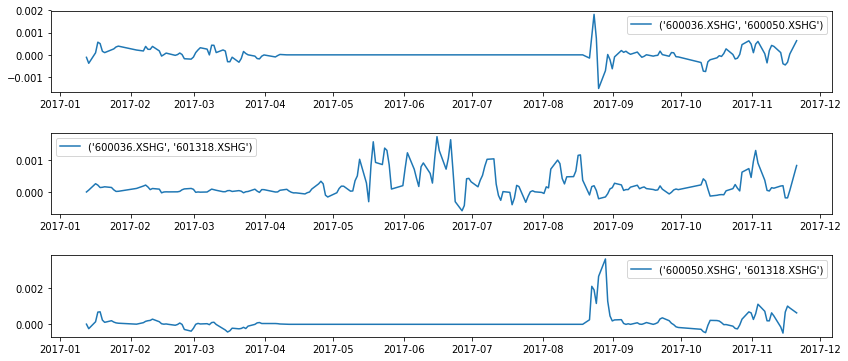

In [58]:
rolling_cov = stock_change.rolling(window = 5).cov()
print(rolling_cov[-6:])
print(type(rolling_cov.index))

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1,figsize=(14, 6))
ax1.plot(rolling_cov.unstack()['600036.XSHG', '600050.XSHG'])
ax1.legend(loc='upper right')
ax2.plot(rolling_cov.unstack()['600036.XSHG', '601318.XSHG'])
ax2.legend(loc='upper left')
ax3.plot(rolling_cov.unstack()['600050.XSHG', '601318.XSHG'])
ax3.legend(loc='upper right')
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

## 3.matplotlib
**填空题：根据以下要求填空**

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(0, 5, 10)

# #   line 1 -- line 4 ，线形图，蓝色线，线宽分别为 0.25 ，0.50 ， 1.00 ，2.00
ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

#   line 5 -- line 8 ，线形图，红色，线宽为2 ，线型（linestyle=）分别为 ‘-‘  ,‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')
ax.plot(x, x+8, color="red", lw=2, ls='steps')

#   line 9 -- line 12 ，线形图，绿色，线宽为2 ， 线型为 ‘--’，点的样式（marker=） '+' , 'o' , 's' , '>'
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='>')

#  line 13-- line 15，
#  线形图，紫色，线宽为1 ， 线型为 ‘-’，点的样式 'o'  ，样式尺寸（markersize）分别为 2,4,8 ，样式颜色（markerfacecolor）：红色
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
plt.show()

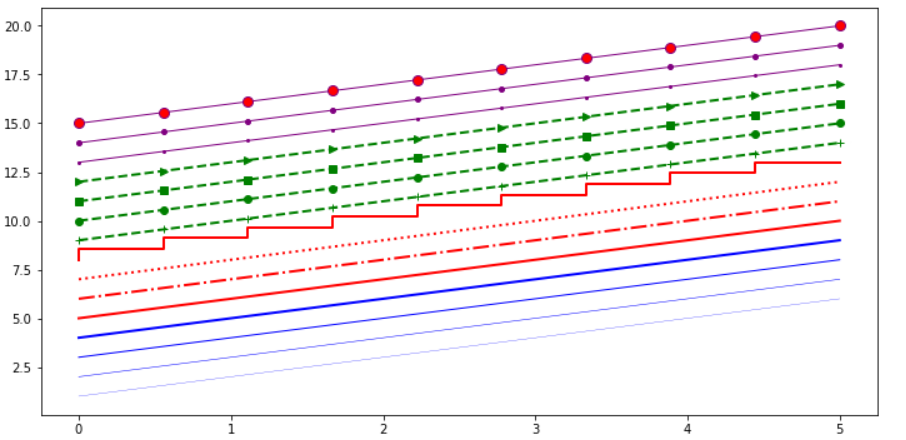